# Project : Case Study (Part - I) 

### Dataset details:

'''
This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

SNo - Serial number.

Date - Date of funding in format DD/MM/YYYY.

StartupName - Name of the startup which got funded.

IndustryVertical - Industry to which the startup belongs.

SubVertical - Sub-category of the industry type.

CityLocation - City which the startup is based out of.

InvestorsName - Name of the investors involved in the funding round.

InvestmentType - Either Private Equity or Seed Funding.

AmountInUSD - Funding Amount in USD.

Remarks - Other information, if any.

Insights -

Find out what type of startups are getting funded in the last few years?

Who are the important investors?

What are the hot fields that get a lot of funding these days?
'''

#### Number of Fundings
Check the trend of investments over the years

###without pandas

In [ ]:
def strtostr(s):
    newStr=""
    for i in range(len(s)):
        if s[i] != ',':
            newStr += s[i]
    return newStr

import csv
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
with open(path) as file_obj:
    file_dict = csv.DictReader(file_obj, skipinitialspace=True)
    yearWiseInv = {}
    for row in file_dict:
        date = row['Date'].strip()
        if date[6] == '/' or date[6]=='.':
            year = float(date[7:])
        elif date[4] == '/' or date[4]=='.':
            year = float(date[5:])
        else:
            year = float(date[6:])

        fund = row['AmountInUSD']
        if fund=='':
            fund=0
        else:
            fund = strtostr(fund)

        if year in yearWiseInv:
            yearWiseInv[year] += float(fund)
        else:
            yearWiseInv[year] = float(fund)
yearWiseInv

{2015.0: 8673022368.0, 2016.0: 3828088608.0, 2017.0: 5846275500.0}

In [ ]:
import numpy as np
year = np.array(list(yearWiseInv.keys()), dtype=int)
year[0],year[2] = year[2],year[0]
print(year)
fund = np.array(list(yearWiseInv.values()), dtype=int)
fund[0],fund[2] = fund[2],fund[0]
print(fund)

[2015 2016 2017]
[8673022368 3828088608 5846275500]


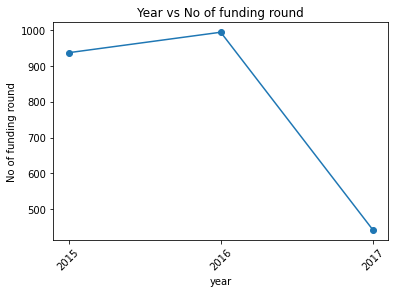

In [ ]:
import matplotlib.pyplot as plt
plt.plot(year, fund, marker= 'o')
plt.xticks(year)
plt.xlabel("year")
plt.ylabel("No of funding round")
plt.title("Year vs No of funding round")
plt.xticks(rotation=45)
plt.show()

Total number of fundings done in each year.

In [ ]:
import csv
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
with open(path) as file_obj:
    file_dict = csv.DictReader(file_obj, skipinitialspace=True)
    yearWiseInv = {}
    for row in file_dict:
        date = row['Date'].strip()
        if date[6] == '/' or date[6]=='.':
            year = float(date[7:])
        elif date[4] == '/' or date[4]=='.':
            year = float(date[5:])
        else:
            year = float(date[6:])


        if year in yearWiseInv:
            yearWiseInv[year] += 1
        else:
            yearWiseInv[year] = 1
yearWiseInv

{2015.0: 936, 2016.0: 993, 2017.0: 443}

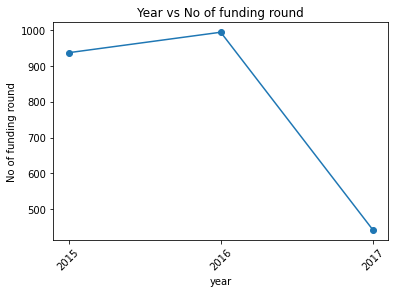

2015 936
2016 993
2017 443


In [ ]:
import numpy as np
year = np.array(list(yearWiseInv.keys()), dtype=int)
year[0],year[2] = year[2],year[0]
fund = np.array(list(yearWiseInv.values()), dtype=int)
fund[0],fund[2] = fund[2],fund[0]

import matplotlib.pyplot as plt
plt.plot(year, fund, marker= 'o')
plt.xticks(year)
plt.xlabel("year")
plt.ylabel("No of funding round")
plt.title("Year vs No of funding round")
plt.xticks(rotation=45)
plt.show()
for i in range(3):
    print(year[i], fund[i])

###with pandas

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df.Date.replace("12/05.2015", "12/05/2015", inplace = True)
df.Date.replace("13/04.2015", "13/04/2015", inplace = True)
df.Date.replace("15/01.2015", "15/01/2015", inplace = True)
df.Date.replace("22/01//2015", "22/01/2015", inplace = True)

def convertDate(date):
    return date.split('/')[-1]

df['Year'] = df['Date'].apply(convertDate)

df.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017


In [ ]:
year_count = df.Year.value_counts()
year_count

2016    993
2015    936
2017    443
Name: Year, dtype: int64

In [ ]:
zip(year_count.index, year_count.values)

In [ ]:
list(zip(year_count.index, year_count.values))

[('2016', 993), ('2015', 936), ('2017', 443)]

In [ ]:
year_fund = list(zip(year_count.index, year_count.values))
year_fund = np.array(year_fund, dtype = int)
year_fund = year_fund[year_fund[:, 0].argsort()]
year = year_fund[:, 0]
funding_round = year_fund[:,1]
for i in range(3):
    print(year[i], funding_round[i])

2015 936
2016 993
2017 443


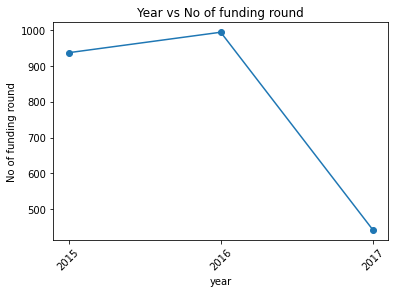

In [ ]:
plt.plot(year, funding_round, marker = 'o')
plt.xticks(year)
plt.xlabel("year")
plt.ylabel("No of funding round")
plt.title("Year vs No of funding round")
plt.xticks(rotation=45)
plt.show()

#### Top Indian Cities
Find top 10 Indian cities which have most number of startups ?

In [ ]:
'''
Note : Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" 
is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian 
startup also. Indian city name is first. Print the city in descending order with respect to the 
number of startups.
Output Format :
city1 number1
city2 number2
'''

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

### dropna is not working so

```
df['CityLocation'].fillna('',inplace=True)
df['CityLocation'].dropna('',inplace=True)
for i in range(len(city)):
    if(city[i] == ''):
        continue
    print(city[i],number[i])
```



In [ ]:
df['CityLocation'].fillna('',inplace=True)
df['CityLocation'].dropna('',inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
city = df['CityLocation'].value_counts()[:10]
number = city.values
city = city.index
for i in range(len(city)):
    if(city[i] == ''):
        continue
    print(city[i],number[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  


###df['CityLocation'].fillna('', inplace = True)
###df = df[df['CityLocation'] != '']

In [ ]:
df['CityLocation'].fillna('', inplace = True)
df = df[df['CityLocation'] != '']
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
city = df['CityLocation'].value_counts()[:10]
city

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

###best option--->  df.dropna(subset = ["CityLocation"], inplace = True)

In [ ]:
df = data.copy()
df.dropna(subset = ["CityLocation"], inplace = True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
city = df['CityLocation'].value_counts()[:10]
city

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

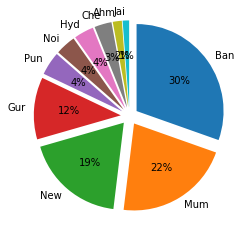

In [ ]:
number = city.values
city = city.index
labels = []
for i in city:
    labels.append(i[:3])
plt.pie(number,labels = labels,autopct='%0.0f%%',counterclock=False,startangle=90,explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

#### Funding amount

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df.dropna(subset = ["CityLocation", "AmountInUSD"], inplace = True)
df.CityLocation.isna().sum()

0

In [ ]:
a = df["AmountInUSD"][0]
a

'1,300,000'

In [ ]:
str(a).replace("," , "")

'1300000'

In [ ]:
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply( lambda  x : float(str(x).replace("," , "")))

In [ ]:
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"] )

In [ ]:
citywise_Inv = df.groupby("CityLocation")["AmountInUSD"].sum()
citywise_Inv[:5]

CityLocation
Ahmedabad    9.818600e+07
Bangalore    8.422974e+09
Belgaum      5.000000e+05
Bhopal       1.900000e+06
Boston       3.000000e+06
Name: AmountInUSD, dtype: float64

In [ ]:
citywise_Inv = df.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending = False)[:10]
citywise_Inv

CityLocation
Bangalore    8.422974e+09
New Delhi    2.818248e+09
Mumbai       2.354934e+09
Gurgaon      2.069022e+09
Chennai      4.111050e+08
Pune         3.666530e+08
Hyderabad    1.953620e+08
Noida        1.706380e+08
Ahmedabad    9.818600e+07
Jaipur       3.556000e+07
Name: AmountInUSD, dtype: float64

In [ ]:
city = citywise_Inv.index
amount = citywise_Inv.values
amount_percent = np.true_divide(amount, amount.sum())*100

for i in range(10):
    print(city[i], round(amount_percent[i], 2))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.9
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


##Investment Type

There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1 

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [ ]:
df.dropna(subset = ['InvestmentType'], inplace = True)

In [ ]:
df['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)
df['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
df['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'],
      dtype=object)

In [ ]:
df['AmountInUSD'] = df['AmountInUSD'].apply( lambda x : float(str(x).replace(",", "")) ) 
amount_investmentType = df.groupby('InvestmentType')['AmountInUSD'].sum()
amount_investmentType = amount_investmentType.sort_values(ascending = False)
investmentType = amount_investmentType.index
amount = amount_investmentType.values
amount_percent = np.true_divide(amount, amount.sum())*100
for i in range(len(amount)):
    print(investmentType[i], f"{ amount_percent[i] : 0.2f}")

Private Equity  98.15
Seed Funding  1.81
Debt Funding  0.04
Crowd Funding  0.00


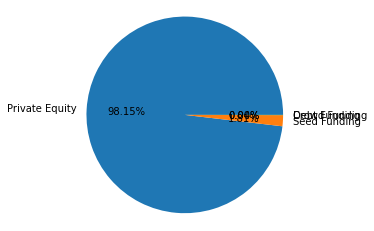

In [ ]:
plt.pie(amount_percent, labels = investmentType, autopct = "%0.2f%%")
plt.axis("equal")
plt.show()

#### Top Industries

Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df['IndustryVertical'].replace("eCommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ECommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ecommerce", "Ecommerce", inplace = True)

In [ ]:
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

industryWise_funding = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:5]
industry = industryWise_funding.index
fund = industryWise_funding.values
fund_percent = np.true_divide(fund, fund.sum())*100

In [ ]:
for i in range(len(fund)):
    print(industry[i], format(fund_percent[i], "0.2f"))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


#### Top startups

Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1
startup2

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df_start = data.copy()

In [ ]:
df_start.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x:float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup=start_fund.index
for i in startup:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


#### Funding rounds

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.


Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


#### Top Investor

Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.
Output Format :
investorname number

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.dropna(subset = ['InvestorsName'], inplace = True)

In [ ]:
def createDict(arr):
    d = {}
    for i in arr:
        if ',' not in i:
            d[i] = d.get(i,0)+1
        else:
            name = i.strip().split(",")
            for j in name:
                d[j.strip()] = d.get(j.strip(), 0) +1
    return d

In [ ]:
dict = createDict(df['InvestorsName'])
df_new = pd.DataFrame(list(dict.values()), list(dict.keys()))
df_new = df_new.sort_values(by = [0], ascending = False) 
#df_new = df_new.sort_values(col1_name, ascending = False) 
print(df_new.index[0], df_new[0][0])
print(df_new.index[0], df_new.values[0][0])
df_new

In [ ]:
from collections import Counter
d={}
def separateCity(n):
    
    n=n.split(',')
    l=[]
    
    for i in n:
        l.append(i.strip())
    for i in l:
        if i in d:
            d[i]=d[i]+1
        else:
            d[i]=1

df['InvestorsName']=df['InvestorsName'].apply(separateCity)
r=Counter(d)
high = r.most_common(5)  
for i in high: 
    print(i[0],i[1]," ") 
    break


Sequoia Capital 64  


# Project : Case Study (Part - II)

## #1 

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [ ]:
df['CityLocation'].isnull().sum()

179

In [ ]:
df.dropna(subset = ['CityLocation'], inplace = True)
df['CityLocation'].isnull().sum()

0

In [ ]:
def getCity(cities):
    li=[ele.strip() for ele in cities.split('/')]#Function to to get the required location by splitting the string
    return li[0]
df['CityLocation']=df['CityLocation'].apply(getCity)

In [ ]:
df['CityLocation'].replace('Delhi', 'New Delhi', inplace = True)
df['CityLocation'].replace('bangalore', 'Bangalore', inplace = True)
df['CityLocation'].replace('New Delhi', 'NCR', inplace = True)
df['CityLocation'].replace('Noida', 'NCR', inplace = True)
df['CityLocation'].replace('Gurgaon', 'NCR', inplace = True)

In [ ]:
df = df[ (df['CityLocation'] == 'Bangalore') | (df['CityLocation'] == 'NCR') | (df['CityLocation'] == 'Mumbai')]
#df.head(5) #use round bracket in above

In [ ]:
city_wise_funding = df['CityLocation'].value_counts()
city = city_wise_funding.index
no_of_funding = city_wise_funding.values

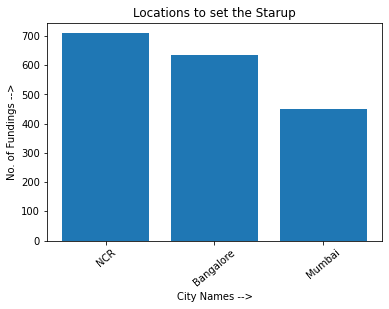

In [ ]:
plt.bar(city,no_of_funding)
plt.title("Locations to set the Starup")
plt.xlabel("City Names -->")
plt.ylabel("No. of Fundings -->")
plt.xticks(rotation=40)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['CityLocation'].dropna(inplace=True)

def city_count(city):
    l = city.split('/')
    for c in l:
        c=c.strip()
        if c in locations:
            d[c]=d.get(c,0)+1
    return
    

df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

locations=['Bangalore','Mumbai','Gurgaon','Noida','New Delhi']
d={}
df['CityLocation'].apply(city_count)

location = np.array(list(d.keys()))
number_of_fundings = np.array(list(d.values()))

print("List of Location with Number of Fundings is given as: ")
for i in range(len(location)):
    print(location[i],"-",number_of_fundings[i])

ind=number_of_fundings.argmax()
print("Maximum Funding is done in",location[ind],",",number_of_fundings[ind],"times.")

plt.bar(location,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Location Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['CityLocation'].dropna(inplace=True)

def city_count(city):
    l = city.split('/')
    for c in l:
        c=c.strip()
        if c in locations:
            d[c]=d.get(c,0)+1
    return
    

df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

locations=['Bangalore','Mumbai','Gurgaon','Noida','New Delhi']
d={}
df['CityLocation'].apply(city_count)

location = np.array(list(d.keys()))
number_of_fundings = np.array(list(d.values()))

print("List of Location with Number of Fundings is given as: ")
for i in range(len(location)):
    print(location[i],"-",number_of_fundings[i])

ind=number_of_fundings.argmax()
print("Maximum Funding is done in",location[ind],",",number_of_fundings[ind],"times.")

plt.bar(location,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Location Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

## #2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.dropna(subset = ['InvestorsName'], inplace = True)

In [ ]:
def createDict(arr):
    d = {}
    for i in arr:
        if ',' not in i:
            d[i] = d.get(i,0)+1
        else:
            name = i.strip().split(",")
            for j in name:
                d[j.strip()] = d.get(j.strip(), 0) +1
    return d

In [ ]:
dict = createDict(df['InvestorsName'])
df_new = pd.DataFrame(list(dict.values()), list(dict.keys()))
df_new = df_new.sort_values(by = [0], ascending = False)[:5] 
df_new.head(2)

,0
Sequoia Capital,64
Accel Partners,53


In [ ]:
investor = df_new.index
print(investor)
print(investor.shape)

Index(['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners',
       'Indian Angel Network'],
      dtype='object')
(5,)


In [ ]:
no_of_funding = df_new.values.reshape(5)
print(no_of_funding.shape)
no_of_funding

(5,)


array([64, 53, 44, 41, 40])

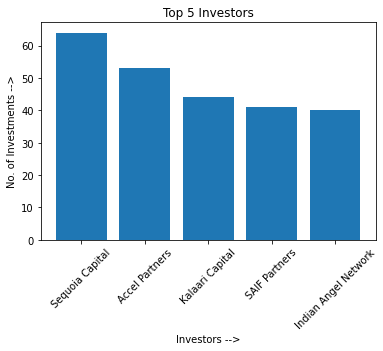

In [ ]:
plt.bar(investor,no_of_funding)
plt.title("Top 5 Investors")
plt.xlabel("Investors -->")
plt.ylabel("No. of Investments -->")
plt.xticks(rotation=45)
plt.show()        

In [ ]:
x=df["InvestorsName"]
x=x.values
d={} #Declaring and defining an empty dictionary
# Iterating through x to get the count of investors
for i in range(len(x)):
    l=x[i].split(',')
    for j in range(len(l)):
        if l[j].strip() in d:
            d[l[j].strip()]+=1
        else:
            d[l[j].strip()]=1
key_list=list(d.keys()) # Putting keys into list
value_list=list(d.values()) # Putting corresponding key values into list
value_list.sort()
value_list.reverse()        #Sorting the values in descending order
xaxis=[]
yaxis=[]
count=0
# Iterating to get top 5 investors
for i in value_list:
    for key in d:
        if(d[key]==i):
            print(key,d[key])
            xaxis.append(key)
            yaxis.append(d[key])
            count+=1
            break
    if count==5:
        break        
# Plotting bar graph        
plt.bar(xaxis,yaxis)
plt.title("Top 5 Investors")
plt.xlabel("Investors -->")
plt.ylabel("No. of Investments -->")
plt.xticks(rotation=40)
plt.show()        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['InvestorsName'].dropna(inplace=True)
d= {}

def investor_count(investor):
    l = investor.split(',')
    for i in l:
        i = i.strip()
        d[i]=d.get(i,0)+1
        
df['InvestorsName'].apply(investor_count)

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['InvestorsName'].dropna(inplace=True)
d= {}

def investor_count(investor):
    l = investor.split(',')
    for i in l:
        i = i.strip()
        d[i]=d.get(i,0)+1
        
df['InvestorsName'].apply(investor_count)

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

## #3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

In [ ]:
startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for name in investor:
        name=name.strip()
        if name != "":
            if name in d:
                s=d[name]
                s.add(startup[i])
                d[name]=s
            else:
                d[name]={startup[i]}

In [ ]:
for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

Top 5 Investors are:
Sequoia Capital - 48
Accel Partners - 47
Kalaari Capital - 41
Indian Angel Network - 40
Blume Ventures - 36


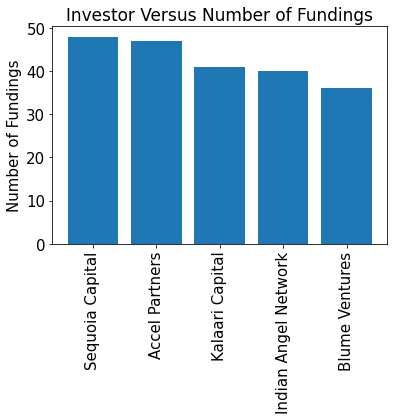

In [ ]:
print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [ ]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# Opening and Reading CSV file
file_obj = open("startup_funding.csv") 
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {} # Declaring and initialising an empty dictionary
# Correcting the required Spellings
for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
    # Filtering the required data
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])
print(d['Sequoia Capital'])
for i in d.keys(): # Substituting the values of key with the length of the values of the key
    d[i] = len(d[i])

d1 = sorted(d, key = d.get, reverse = True) # Sorting to get top 5 values
 
investors = d1[0:5]
num_of_companies = []

top_5_investors = d1[0:5]
number = []

for i in top_5_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
# Plotting bar graph 
plt.bar(investors, num_of_companies)
plt.xlabel("Investors-->")
plt.ylabel("No. of Investments-->")
plt.title("Top 5 Investors in Distinct companies")
plt.xticks(rotation = 15)
plt.grid()
plt.show()
# Printing the Top 5 inverstors
for i in investors:
    print(i,d[i])

## #4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

In [ ]:
d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

In [ ]:
ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network - 33
Rajan Anandan - 23
LetsVenture - 16
Anupam Mittal - 16
Group of Angel Investors - 14


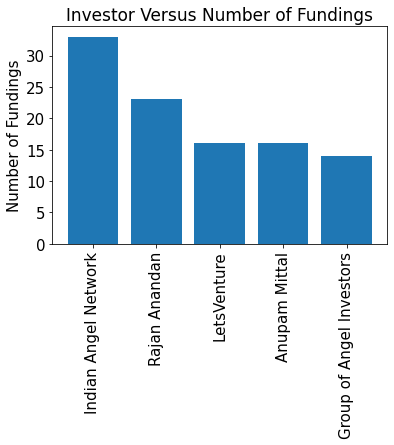

In [ ]:
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [ ]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# Opening and reading CSV file
file_obj = open("startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {} # Declaring and initialising an empty dictionary

# Correcting the required Spellings

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
    if row["InvestmentType"]=="SeedFunding":
         row["InvestmentType"]="Seed Funding"
    if row["InvestmentType"]=="PrivateEquity":
         row["InvestmentType"]="Private Equity"
    if  row["InvestmentType"]=="Crowd funding":
         row["InvestmentType"]="Crowd Funding"
    # Filtering the required data  
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if( row["InvestmentType"]=="Seed Funding") or (row["InvestmentType"]=="Crowd Funding"):
                                         if i in d:
                                            d[i].add(row["StartupName"])
                                         else:
                                            d[i] = set()
                                            d[i].add(row["StartupName"])

for i in d.keys(): # Substituting the values of key with the length of the values of the key

    d[i] = len(d[i]) 

d1 = sorted(d, key = d.get, reverse = True) # Sorting to get top 5 values
investors = d1[0:5]
num_of_companies = []

top_5_investors = d1[0:5]
number = []

for i in top_5_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
# Plotting Bar Graph
plt.bar(investors, num_of_companies)
plt.xlabel("Investors -->")
plt.ylabel("NO. of Investments-->")
plt.title("Top 5 Investors in Distinct companies  with Investment Type as Crowd Funding or Seed Funding")
plt.xticks(rotation = 15)
plt.grid()

plt.show()
# Printing the Top 5 required investors
for i in investors:
    print(i,d[i])

## #5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()

In [ ]:
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

In [ ]:
d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

In [ ]:
ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24


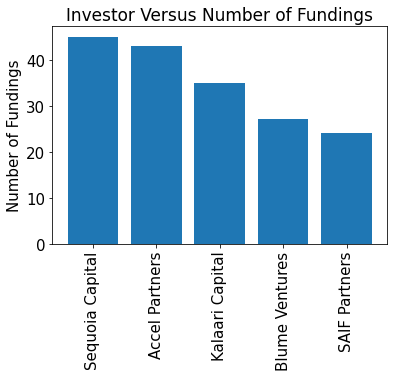

In [ ]:
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [ ]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# Opening and reading the CSV file
file_obj = open("startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {} # Declaring and initialising an empty dictionary

# Correcting the required Spellings

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
    if row["InvestmentType"]=="SeedFunding":
         row["InvestmentType"]="Seed Funding"
    if row["InvestmentType"]=="PrivateEquity":
         row["InvestmentType"]="Private Equity"
    if  row["InvestmentType"]=="Crowd funding":
         row["InvestmentType"]="Crowd Funding"
     # Filtering the required data   
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if( row["InvestmentType"]=="Private Equity"):
                                         if i in d:
                                            d[i].add(row["StartupName"])
                                         else:
                                            d[i] = set()
                                            d[i].add(row["StartupName"])

for i in d.keys():  #Substituting the values of key with the length of the values of the key
    d[i] = len(d[i])

d1 = sorted(d, key = d.get, reverse = True) #  Sorting to get top 5 values

investors = d1[0:5]
num_of_companies = []

top_5_investors = d1[0:5]
number = []

for i in top_5_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
# Plotting the Bar graph
plt.bar(investors, num_of_companies)
plt.xlabel("Investors-->")
plt.ylabel("No. of Investments-->")
plt.title("Top 5 Investors in Distinct companies with Investment Type as Private Equity")
plt.xticks(rotation = 15)
plt.grid()

plt.show()
# Printing the required top 5 investors
for i in investors:
    print(i,d[i])

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()